In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import re
import string

In [2]:
# Load the data

df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [3]:
# Adding a new column: giving a class to fake and true news

df_fake["class"] = 0
df_true["class"] = 1

In [4]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [6]:
# Since we don't need the columns 'title', 'subject', and 'date', we dropped it

df = df_marge.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [7]:
# The next fuction clean the text from extra space, special caracters, URL, and lowercase

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [9]:
# In order to clean our Database text, we apply the previous fuction to our column 'text'

df["text"] = df["text"].apply(wordopt)
df.head()

,text,class
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauk...,0
3,on christmas day donald trump announced that ...,0
4,pope francis used his annual christmas day mes...,0


In [10]:
# Shuffling
df = df.sample(frac = 1)

In [11]:
# Reset Index: 0, 1, 2...
df.reset_index(inplace = True)

In [12]:
# Deleting Index colum
df.drop(["index"], axis = 1, inplace = True)
df.head()

,text,class
0,donald trump has been extremely active on twit...,0
1,melania and ivanka trump were standouts at the...,0
2,cnn probably detests citizen journalists who b...,0
3,this is the dumbest and biggest crime in the h...,0
4,patrick henningsen century wire as reported ...,0


In [18]:
x_train = df["text"]
y_train = df["class"]

## Text to Vectors

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)

## Defining x Test

In [31]:
news = pd.read_csv('news.csv')

In [32]:
# Mapping and changing Sex type
news['label'] = news['label'].map({'FAKE':0, 'REAL':1}).astype(int)

In [33]:
y_test = news['label']

In [34]:
news["text"] = news["text"].apply(wordopt) 
x_test = news["text"]
xv_test = vectorization.transform(x_test)

## Confusion Matrix

In [48]:
from sklearn.metrics import plot_confusion_matrix

In [69]:
def conf_mat_acc(model):
    disp = plot_confusion_matrix(model, xv_test, y_test, cmap=plt.cm.Blues, values_format='d')
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print('accuracy: ', np.round(accuracy, 2))
    plt.show()

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [64]:
# Training Logistic regretion model

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [54]:
pred_lr=LR.predict(xv_test)
pred_lr

array([0, 0, 1, ..., 0, 1, 0])

In [65]:
LR.score(xv_test, y_test)

0.5928966061562747

In [67]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.56      0.93      0.69      3164
           1       0.78      0.26      0.39      3171

    accuracy                           0.59      6335
   macro avg       0.67      0.59      0.54      6335
weighted avg       0.67      0.59      0.54      6335



accuracy:  0.59


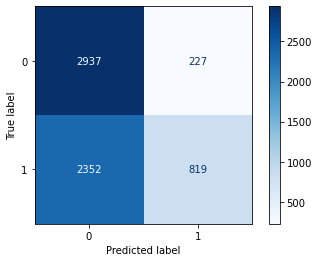

In [70]:
conf_mat_acc(LR)

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)

In [42]:
DT.score(xv_test, y_test)

0.5016574585635359

accuracy:  0.5


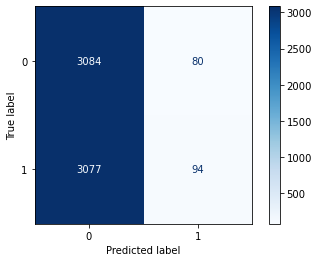

In [71]:
conf_mat_acc(DT)

## Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [46]:
pred_gbc = GBC.predict(xv_test)

In [47]:
GBC.score(xv_test, y_test)

0.5016574585635359

accuracy:  0.5


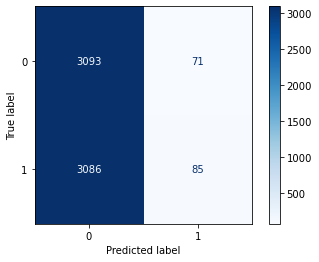

In [72]:
conf_mat_acc(GBC)